# Catmull-Rom Splines Python Notebook

This is a Python notebook intended to help users mess around and understand 
Catmull-Rom Splines in Python with good ol' Numpy.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

Below is the Python implementation of the Catmull-Rom Spline, which takes in 
the 4 points as well as tau, and returns the 4 coefficients.

In [2]:
def catmull_rom_spline(tau, points):
    points = np.array(points)
    print(points)
    matrix = np.array([
        [0, 1, 0, 0],
        [-tau, 0, tau, 0],
        [2*tau, tau-3, 3-(2*tau), -tau],
        [-tau, 2-tau, tau-2, tau],
    ])
    coeffs = np.matmul(matrix, points)
    return coeffs

We can mess around with different values of tau and different point(s) arrays and see the resulting coefficients. The below example is:
The first spline goes from 0.01 to 1.8, and the second one goes from 1.8 down to 0. We can graph the results later, too!

In [3]:

# generate points before
# set tau again if need be
tau = 0.3
max_vel = 2.1
x1 = 0.01
x2 = 0
first_points = [0, x1, max_vel, max_vel]
second_points = [max_vel, max_vel, 0, 0]

# points = [-0.3, 0.1, 0.5, 0.9]

first_spline = catmull_rom_spline(tau, first_points)
second_spline = catmull_rom_spline(tau, second_points)


[0.   0.01 2.1  2.1 ]
[2.1 2.1 0.  0. ]


Below is a function that calculates the result from an $n$ order polynomial, where $n = $ `len(coeffs)`. `x` is simply a numerical input in this case.

In [4]:
# get some points
def calc_poly(coeffs, x):
    y = 0
    power = 0
    for c in coeffs:
        y+=(c*(x**power))
        power+=1
    return y


In [5]:
# getting two arrays from the two splines that we can graph
arr1 = np.array([calc_poly(first_spline, x) for x in np.linspace(0,1)])
arr2 = np.array([calc_poly(second_spline, x) for x in np.linspace(0,1)])

In [6]:
full_arr = np.concatenate((arr1, arr2))

In [7]:
# let's check out the full result!
full_arr

array([ 1.00000000e-02,  2.46577871e-02,  4.28174825e-02,  6.43300156e-02,
        8.90463157e-02,  1.16817313e-01,  1.47493935e-01,  1.80927114e-01,
        2.16967777e-01,  2.55466855e-01,  2.96275276e-01,  3.39243971e-01,
        3.84223869e-01,  4.31065899e-01,  4.79620991e-01,  5.29740074e-01,
        5.81274078e-01,  6.34073932e-01,  6.87990565e-01,  7.42874908e-01,
        7.98577888e-01,  8.54950437e-01,  9.11843484e-01,  9.69107957e-01,
        1.02659479e+00,  1.08415490e+00,  1.14163923e+00,  1.19889871e+00,
        1.25578426e+00,  1.31214681e+00,  1.36783730e+00,  1.42270664e+00,
        1.47660579e+00,  1.52938565e+00,  1.58089716e+00,  1.63099125e+00,
        1.67951886e+00,  1.72633090e+00,  1.77127831e+00,  1.81421202e+00,
        1.85498296e+00,  1.89344205e+00,  1.92944023e+00,  1.96282843e+00,
        1.99345757e+00,  2.02117859e+00,  2.04584241e+00,  2.06729997e+00,
        2.08540219e+00,  2.10000000e+00,  2.10000000e+00,  2.08533111e+00,
        2.06713869e+00,  

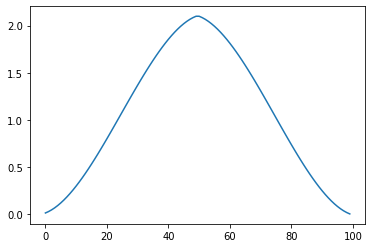

In [8]:
# plot the two splines
plt.plot(full_arr)

# separate function 
def catmull_norm(max_val):
    arr = np.linspace(0, max_val)
    arr = arr / max_val

